In [2]:
# Standard library imports
import os
import sys

# Third-party library imports
import numpy as np
import pandas as pd
import pyarrow
import matplotlib
import seaborn
import scipy

class Time:
 """Class Time with read-write properties."""

def __init__(self, hour=0, minute=0, second=0):
     """Initialize each attribute."""
     self.hour = hour # 0-23
     self.minute = minute # 0-59
     self.second = second # 0-59

@property
def hour(self):
 """Return the hour."""
 return self._hour

 @hour.setter
 def hour(self, hour):
  """Set the hour."""
 if not (0 <= hour < 24):
  raise ValueError(f'Hour ({hour}) must be 0-23')

 self._hour = hour

 @property
 def minute(self):
  """Return the minute."""
  return self._minute

 @minute.setter
 def minute(self, minute):
  """Set the minute."""
  if not (0 <= minute < 60):
   raise ValueError(f'Minute ({minute}) must be 0-59')

  self._minute = minute
 property
 def second(self):
  """Return the second."""
  return self._second

 @second.setter
 def second(self, second):
  """Set the second."""
 if not (0 <= second < 60):
  raise ValueError(f'Second ({second}) must be 0-59')

  self._second = second

 def set_time(self, hour=0, minute=0, second=0):
  """Set values of hour, minute, and second."""
  self.hour = hour
  self.minute = minute
  self.second = second

 def __repr__(self):
  """Return Time string for repr()."""
  return (f'Time(hour={self.hour}, minute={self.minute}, ' +
  f'second={self.second})')
 

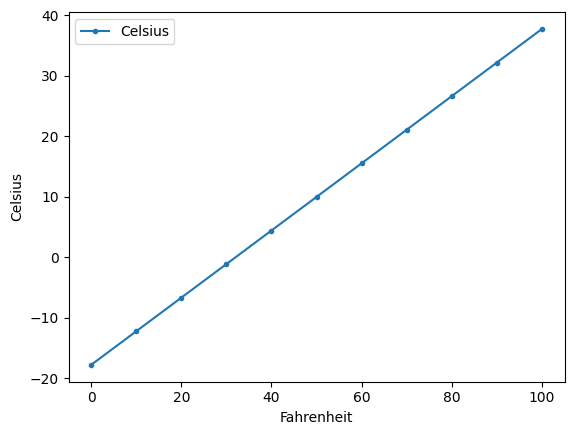

In [9]:
import pandas as pd

c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

### Loading the Average High Temperature  into a DataFrame

In [13]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.head()
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Cleaning the data

In [15]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)
nyc.Date.dtype

dtype('int64')

### Calculating Basic Descriptive Statistics for the Dataset

In [18]:
#pd.set_option('precision', 2)
nyc.Temperature.describe()

count    124.000000
mean      37.595161
std        4.539848
min       26.100000
25%       34.575000
50%       37.600000
75%       40.600000
max       47.600000
Name: Temperature, dtype: float64

### Forecasting Future January Average High Temperatures

In [22]:
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
linear_regression.slope
linear_regression.intercept
linear_regression.slope * 2019 + linear_regression.intercept
linear_regression.slope * 1890 + linear_regression.intercept

8.974024245476013

### Plotting the Average High Temperatures and a Regression Line

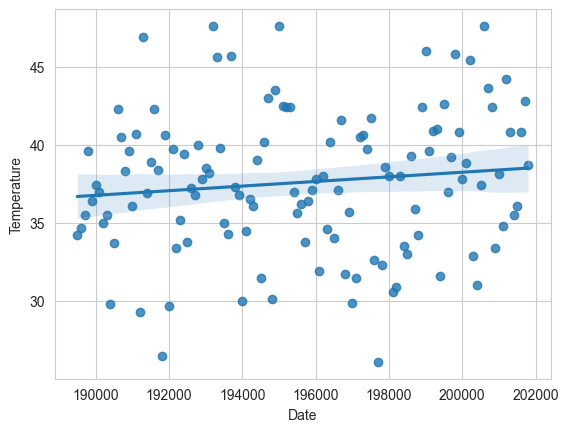

In [23]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
